# Intermediate Pandas

### Prerequisites

Working through the project pythia pandas notebook

# Imports

In [1]:
import pandas as pd
import numpy as np

# We will use this to pull some data
from metpy.cbook import get_test_data
from metpy.io import metar

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
%load_ext watermark
%watermark --iversions

metpy : 1.3.1
numpy : 1.21.5
sys   : 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
pandas: 1.4.3



# Loading in station data using metpy

In [3]:
df = metar.parse_metar_file(get_test_data('metar_20190701_1200.txt', as_file_obj=False))
print('data type:', type(df))

data type: <class 'pandas.core.frame.DataFrame'>


## Debugging your dataset

This dataset looks mostly good! Will run through some steps to clean up your data set. This is one order to do these steps, they can be somewhat interchangeable, depending on dataset and needs. 

In [4]:
# Just to get a handle on dataset size, this dataframe is 8980 rows by 31 columns
df.shape

(8980, 31)

In [5]:
mb = df.memory_usage(index=True).sum() / 1000000 # conversion from bytes to mb
print('dataframe size in mb:', mb)

dataframe size in mb: 2.29888


Head is commonly used to look at the first few rows, but there is also a function called tail to look at the last few rows. Depending on dataset, this might be better 

In [6]:
df.tail(3)

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
VAUD,VAUD,24.620000,73.900000,513.0,2022-09-01 12:30:00,320.0,6.0,NaN,4000.0,HZ,...,34.0,23.0,29.53,5,0,0,,996.02,3.856726,-4.596267
VAUD,VAUD,24.620000,73.900000,513.0,2022-09-01 12:00:00,230.0,6.0,NaN,5000.0,HZ,...,36.0,23.0,29.53,5,0,0,NOSIG,995.66,4.596267,3.856726
VIDN,VIDN,30.316667,78.033333,683.0,2022-09-01 12:30:00,280.0,4.0,NaN,3000.0,HZ,...,35.0,22.0,29.44,5,0,0,,991.18,3.939231,-0.694593


the .describe() function is a great way to get an initial screen on what your dataframe looks like.

In [7]:
df.describe()

,latitude,longitude,elevation,wind_direction,wind_speed,wind_gust,visibility,low_cloud_level,medium_cloud_level,high_cloud_level,...,cloud_coverage,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,air_pressure_at_sea_level,eastward_wind,northward_wind
count,8968.000000,8968.000000,8968.000000,8577.000000,8844.000000,347.00000,8486.000000,3867.000000,1641.000000,626.000000,...,8980.000000,8779.000000,8740.000000,8458.000000,8980.000000,8980.000000,8980.000000,8378.000000,8577.000000,8577.000000
mean,36.980615,-48.708353,338.269514,159.668299,5.813561,23.11040,12795.700127,4021.618826,7252.650823,9518.210863,...,2.961915,21.163572,15.192334,29.991640,9.147661,0.148664,0.001782,1015.008958,1.626801,-0.167055
std,18.608599,72.787016,497.103554,123.792621,5.347865,7.10171,4792.889909,4580.408037,6667.621571,7649.086993,...,3.473653,7.323709,6.719561,0.188503,73.333972,2.184408,0.168843,6.648597,5.897880,5.142483
min,-89.980000,-177.370000,-35.000000,0.000000,0.000000,11.00000,100.000000,0.000000,0.000000,400.000000,...,0.000000,-57.000000,-38.000000,28.200000,0.000000,0.000000,0.000000,974.000000,-32.498656,-37.000000
25%,33.070000,-96.270000,38.750000,10.000000,2.000000,18.00000,9999.000000,1400.000000,2700.000000,4000.000000,...,0.000000,17.000000,11.000000,29.950000,0.000000,0.000000,0.000000,1013.860000,-0.694593,-2.500000
50%,39.785000,-82.170000,178.000000,170.000000,5.000000,22.00000,14484.096000,2500.000000,4900.000000,7500.000000,...,0.000000,22.000000,16.000000,30.030000,0.000000,0.000000,0.000000,1016.320000,0.000000,0.000000
75%,46.520000,7.382500,382.000000,270.000000,8.000000,27.50000,16093.440000,4800.000000,9500.000000,11000.000000,...,6.000000,25.000000,21.000000,30.080000,0.000000,0.000000,0.000000,1018.200000,4.000000,2.604723
max,82.520000,179.980000,4014.000000,360.000000,37.000000,51.00000,128747.520000,35000.000000,31000.000000,33000.000000,...,10.000000,91.000000,97.000000,30.770000,1097.000000,81.000000,16.000000,1051.990000,30.000000,23.492316


Can also use your own percentiles:

In [8]:
df.describe(percentiles=[.1, .5, .55, .9])

,latitude,longitude,elevation,wind_direction,wind_speed,wind_gust,visibility,low_cloud_level,medium_cloud_level,high_cloud_level,...,cloud_coverage,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,air_pressure_at_sea_level,eastward_wind,northward_wind
count,8968.000000,8968.000000,8968.000000,8577.000000,8844.000000,347.00000,8486.000000,3867.000000,1641.000000,626.000000,...,8980.000000,8779.000000,8740.000000,8458.000000,8980.000000,8980.000000,8980.000000,8378.000000,8.577000e+03,8577.000000
mean,36.980615,-48.708353,338.269514,159.668299,5.813561,23.11040,12795.700127,4021.618826,7252.650823,9518.210863,...,2.961915,21.163572,15.192334,29.991640,9.147661,0.148664,0.001782,1015.008958,1.626801e+00,-0.167055
std,18.608599,72.787016,497.103554,123.792621,5.347865,7.10171,4792.889909,4580.408037,6667.621571,7649.086993,...,3.473653,7.323709,6.719561,0.188503,73.333972,2.184408,0.168843,6.648597,5.897880e+00,5.142483
min,-89.980000,-177.370000,-35.000000,0.000000,0.000000,11.00000,100.000000,0.000000,0.000000,400.000000,...,0.000000,-57.000000,-38.000000,28.200000,0.000000,0.000000,0.000000,974.000000,-3.249866e+01,-37.000000
10%,18.500000,-114.620000,9.000000,0.000000,0.000000,15.00000,9000.000000,500.000000,1500.000000,2500.000000,...,0.000000,11.000000,7.000000,29.740000,0.000000,0.000000,0.000000,1006.267000,-4.000000e+00,-6.062178
50%,39.785000,-82.170000,178.000000,170.000000,5.000000,22.00000,14484.096000,2500.000000,4900.000000,7500.000000,...,0.000000,22.000000,16.000000,30.030000,0.000000,0.000000,0.000000,1016.320000,0.000000e+00,0.000000
55%,40.980000,-78.720000,205.000000,200.000000,5.000000,23.00000,16093.440000,3000.000000,5200.000000,8000.000000,...,2.000000,22.000000,17.000000,30.040000,0.000000,0.000000,0.000000,1016.760000,4.849601e-15,-0.000000
90%,54.120000,52.570000,908.000000,320.000000,13.000000,32.40000,16093.440000,10000.000000,17000.000000,25000.000000,...,8.000000,30.000000,23.000000,30.150000,10.000000,0.000000,0.000000,1020.343000,9.192533e+00,5.638156
max,82.520000,179.980000,4014.000000,360.000000,37.000000,51.00000,128747.520000,35000.000000,31000.000000,33000.000000,...,10.000000,91.000000,97.000000,30.770000,1097.000000,81.000000,16.000000,1051.990000,3.000000e+01,23.492316


### Datatypes

Data types (dtypes) are key in pandas. The dtype is generally inferred on ingestion, and can be changed. Datetime is a common one that can cause some heartburn, and int64 vs float64 is another common one. If a tool is not behaving like you expect, worth digging into!

Link to dtype basics here: https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes

In [9]:
df.dtypes

station_id                           object
latitude                            float64
longitude                           float64
elevation                           float64
date_time                    datetime64[ns]
wind_direction                      float64
wind_speed                          float64
wind_gust                           float64
visibility                          float64
current_wx1                          object
current_wx2                          object
current_wx3                          object
low_cloud_type                       object
low_cloud_level                     float64
medium_cloud_type                    object
medium_cloud_level                  float64
high_cloud_type                      object
high_cloud_level                    float64
highest_cloud_type                   object
highest_cloud_level                 float64
cloud_coverage                        int64
air_temperature                     float64
dew_point_temperature           

## nan hunting

nans (not a number) are common for many, many datasets. Sometimes for the analysis, it does not matter, other times you need to deal with them!

In [10]:
# This shows 
df.isnull().sum().sort_values(ascending=False)

current_wx3                  8979
highest_cloud_level          8943
highest_cloud_type           8943
current_wx2                  8898
wind_gust                    8633
high_cloud_level             8354
high_cloud_type              8348
current_wx1                  7890
medium_cloud_level           7339
medium_cloud_type            7334
low_cloud_level              5113
low_cloud_type               1619
air_pressure_at_sea_level     602
altimeter                     522
visibility                    494
eastward_wind                 403
northward_wind                403
wind_direction                403
dew_point_temperature         240
air_temperature               201
wind_speed                    136
latitude                       12
elevation                      12
longitude                      12
cloud_coverage                  0
date_time                       0
current_wx1_symbol              0
current_wx2_symbol              0
current_wx3_symbol              0
remarks       

This also highlights how you can chain a lot of the functions in pandas together. Takes some time to figure out what can work in what order!

#### dropping rows and columns based on nans

In [11]:
# axis = 0, rows, axis =1, columns
# thresh = how many non-nans need to be in the row

df.dropna(axis=0, thresh=20) # adjust the variables to see how much data you lose!

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KRCM,KRCM,38.780000,-93.800000,244.0,2022-09-01 11:55:00,0.0,0.0,NaN,16093.440,NaN,...,21.0,20.0,30.05,0,0,0,AO2,1017.25,-0.000000e+00,-0.000000
KIPJ,KIPJ,35.470000,-81.170000,267.0,2022-09-01 11:50:00,0.0,0.0,NaN,11265.408,NaN,...,21.0,21.0,30.02,0,0,0,AO2 70004 T02120212 10225 20196,1016.15,-0.000000e+00,-0.000000
KGPH,KGPH,39.330000,-94.320000,235.0,2022-09-01 11:55:00,0.0,0.0,NaN,16093.440,NaN,...,21.0,20.0,30.05,0,0,0,AO2,1017.27,-0.000000e+00,-0.000000
KFDW,KFDW,34.320000,-81.120000,176.0,2022-09-01 11:55:00,0.0,0.0,NaN,16093.440,NaN,...,22.0,21.0,29.98,0,0,0,AO1,1015.00,-0.000000e+00,-0.000000
MMIO,MMIO,25.550000,-100.930000,1790.0,2022-09-01 11:40:00,180.0,10.0,NaN,16093.440,NaN,...,19.0,8.0,30.21,0,0,0,CI,1016.24,-1.224647e-15,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIJU,VIJU,32.683333,74.833333,314.0,2022-09-01 12:30:00,20.0,20.0,32.0,5000.000,BLDU,...,34.0,11.0,NaN,1007,0,0,,NaN,-6.840403e+00,-18.793852
VISR,VISR,33.970000,74.770000,1666.0,2022-09-01 12:30:00,NaN,2.0,NaN,6000.000,NaN,...,22.0,15.0,29.94,0,0,0,,1005.71,NaN,NaN
VAUD,VAUD,24.620000,73.900000,513.0,2022-09-01 12:30:00,320.0,6.0,NaN,4000.000,HZ,...,34.0,23.0,29.53,5,0,0,,996.02,3.856726e+00,-4.596267


In [12]:
print('part 0:', df.shape)
df = df.dropna(axis=0, thresh=23) # dropping rows that 23 real datapoints or less
print('part 1:', df.shape)
df = df.dropna(axis=1, thresh=750) # dropping columns that 750 real datapoints or less
print('part 2:', df.shape)

part 0: (8980, 31)
part 1: (1540, 31)
part 2: (1540, 23)


We have a smaller data frame, but still have some nan's

In [13]:
df.isnull().sum().sort_values(ascending=False) # same exact function as above

air_pressure_at_sea_level    54
altimeter                    50
medium_cloud_level           47
medium_cloud_type            47
dew_point_temperature        19
air_temperature              16
eastward_wind                12
northward_wind               12
wind_direction               12
visibility                    4
low_cloud_level               3
latitude                      1
elevation                     1
longitude                     1
low_cloud_type                0
cloud_coverage                0
wind_speed                    0
date_time                     0
current_wx1_symbol            0
current_wx2_symbol            0
current_wx3_symbol            0
remarks                       0
station_id                    0
dtype: int64

let's drop the top two colemns that have nans

In [14]:
top2 = df.isnull().sum().sort_values(ascending=False).head(2)
print(type(top2))
top2.index.values

<class 'pandas.core.series.Series'>


array(['air_pressure_at_sea_level', 'altimeter'], dtype=object)

Now let's check how many columns we have now!

In [15]:
df2 = df.drop(axis = 1, labels = top2.index.values)
print(df2.shape)
df2.columns

(1540, 21)


Index(['station_id', 'latitude', 'longitude', 'elevation', 'date_time',
       'wind_direction', 'wind_speed', 'visibility', 'low_cloud_type',
       'low_cloud_level', 'medium_cloud_type', 'medium_cloud_level',
       'cloud_coverage', 'air_temperature', 'dew_point_temperature',
       'current_wx1_symbol', 'current_wx2_symbol', 'current_wx3_symbol',
       'remarks', 'eastward_wind', 'northward_wind'],
      dtype='object')

Looks like we lost the two columns (as expected)

### Subsetting based on value

Looking at the latitude values, lets only grab samples from 20 and greater!

In [16]:
df2.latitude.describe()

count    1539.000000
mean       36.984542
std        22.611705
min       -77.870000
25%        27.470000
50%        43.530000
75%        51.801667
max        82.520000
Name: latitude, dtype: float64

In [17]:
df2 = df2[df2.latitude > 20]
df2

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,visibility,low_cloud_type,low_cloud_level,...,medium_cloud_level,cloud_coverage,air_temperature,dew_point_temperature,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
MMCS,MMCS,31.620000,-106.420000,1171.0,2022-09-01 11:44:00,120.0,5.0,16093.44,SCT,5000.0,...,25000.0,4,23.0,7.0,0,0,0,SLP047 5//// 977 8/105 RTS,-4.330127,2.500000
KBAK,KBAK,39.270000,-85.900000,200.0,2022-09-01 11:45:00,0.0,0.0,16093.44,FEW,10000.0,...,25000.0,4,20.0,18.0,0,0,0,,-0.000000,-0.000000
PAKU,PAKU,70.310000,-149.580000,2.0,2022-09-01 11:45:00,210.0,7.0,16093.44,FEW,4200.0,...,5000.0,6,9.0,9.0,0,0,0,,3.500000,6.062178
KATW,KATW,44.270000,-88.520000,280.0,2022-09-01 11:45:00,260.0,4.0,16093.44,SCT,300.0,...,8000.0,6,19.0,19.0,0,0,0,,3.939231,0.694593
KCWA,KCWA,44.780000,-89.670000,389.0,2022-09-01 11:48:00,0.0,0.0,16093.44,SCT,7500.0,...,9000.0,4,18.0,17.0,0,0,0,,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VICG,VICG,30.670000,76.780000,308.0,2022-09-01 12:30:00,340.0,9.0,6000.00,FEW,3000.0,...,3000.0,2,38.0,19.0,0,0,0,NOSIG,3.078181,-8.457234
VIJU,VIJU,32.683333,74.833333,314.0,2022-09-01 12:30:00,20.0,20.0,5000.00,SCT,2000.0,...,3000.0,6,34.0,11.0,1007,0,0,,-6.840403,-18.793852
VAUD,VAUD,24.620000,73.900000,513.0,2022-09-01 12:30:00,320.0,6.0,4000.00,SCT,2500.0,...,3000.0,4,34.0,23.0,5,0,0,,3.856726,-4.596267


## Groupby

From the docs:

'A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.'

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [22]:
df2.groupby(by = ['latitude'], axis =0).count()


,station_id,longitude,elevation,date_time,wind_direction,wind_speed,visibility,low_cloud_type,low_cloud_level,medium_cloud_type,medium_cloud_level,cloud_coverage,air_temperature,dew_point_temperature,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,eastward_wind,northward_wind
latitude,,,,,,,,,,,,,,,,,,,,
20.250000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
20.300000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20.520000,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
20.620000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
20.816667,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.310000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
70.330000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
70.470000,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


Too many individual latitudes! Lets make a new column, lat_rnd. This can be done with numpy, but can also be done with Pandas. 

In [27]:
df2['lat_rnd'] = df2.latitude.round(0)

<AxesSubplot:xlabel='lat_rnd'>

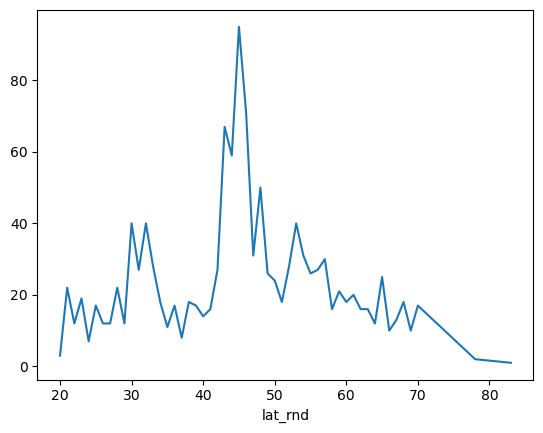

In [32]:
df2.groupby(by = ['lat_rnd'], axis =0).station_id.count().plot()

From this, we can easily tell that not all stations are equally distributed!